# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore')

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [23]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,791,86,43,68,150,64,9,138,48,18,143,161,285,174,69,6,0,192,201
1,512,103,54,107,189,56,11,223,30,25,174,225,729,200,70,0,29,187,201
2,491,97,45,76,175,60,9,157,42,20,149,180,370,169,63,16,12,198,206
3,125,90,46,80,143,62,11,159,43,20,156,169,366,186,74,17,7,185,193
4,57,89,47,84,133,55,11,157,44,20,160,169,354,176,74,5,9,182,192
5,373,96,47,77,204,72,6,167,38,20,150,188,429,182,69,6,16,199,203
6,437,84,40,71,131,55,7,150,45,19,134,167,330,165,80,12,1,180,186
7,62,96,40,70,120,50,8,137,50,18,141,162,269,139,80,10,13,183,183
8,603,90,36,85,184,64,6,160,41,20,125,187,385,139,66,9,31,195,203
9,402,101,52,105,162,53,10,212,31,24,163,226,669,204,74,12,11,186,194


Methods `describe` and `info` deliver some useful information.

In [24]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,412.806922,93.890710,45.014572,82.386157,169.772313,61.788707,8.644809,169.737705,40.723133,20.648452,148.402550,189.468124,444.550091,175.364299,72.528233,6.364299,12.626594,188.943534,195.724954
std,246.740391,8.346449,6.230354,15.839992,34.259277,8.574224,4.858910,33.463299,7.804397,2.614234,14.668107,31.919570,178.415082,32.737095,7.736869,4.814277,8.946154,6.264727,7.534043
min,0.000000,77.000000,33.000000,44.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,132.000000,192.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,201.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,321.000000,151.000000,67.000000,3.000000,5.000000,184.000000,191.000000
50%,410.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,367.000000,174.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,631.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,200.000000,46.000000,23.000000,161.000000,217.000000,601.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [25]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int32
1     549 non-null int32
2     549 non-null int32
3     549 non-null int32
4     549 non-null int32
5     549 non-null int32
6     549 non-null int32
7     549 non-null int32
8     549 non-null int32
9     549 non-null int32
10    549 non-null int32
11    549 non-null int32
12    549 non-null int32
13    549 non-null int32
14    549 non-null int32
15    549 non-null int32
16    549 non-null int32
17    549 non-null int32
18    549 non-null int32
dtypes: int32(19)
memory usage: 40.8 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Нормируем данные, используя встроенный в sklearn StandardScaler (из каждого значения вычетаем среднее по столбцу и делим на дисперсию). Как итог $M(X[:, j]) = 0$, $\sigma(X[:, j]) = 1$. Для корректной работы алгоритма логистической регрессии нормировка данных необходима. В случае наличия очень маленьких и/или очень больших величин в датасете, логистическая регрессия будет некорректно подбирать коэффициенты. Другими словами, нормировка используется для борьбы с выбросами.     

In [26]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

# Используем GridSearchCV для поиска оптимальных гиперпараметров (поиск по решётке с использованием cross validation). 
# Перебираются 2 параметра - коэффициент регуляризации и метрика

LogisticRegression_grid_search = GridSearchCV(
                            LogisticRegression(multi_class = 'multinomial',
                                               solver = 'saga',
                                               tol = 1e-3,
                                               max_iter = 500),
                            [{
                            'C': [100, 10, 1, 0.1, 0.01, 0.001], 
                            'penalty': ['l1', 'l2'],
                            }],  
                            cv=5,
                            n_jobs=-1, # количество параллельных процессов (при -1 запускается на всех ядрах процессора)
                            scoring='accuracy')


y_pred = LogisticRegression_grid_search.fit(X_train_scaled, y_train).predict(X_test_scaled)

print("optimal hyperparameters:", LogisticRegression_grid_search.best_params_)
print("f1 score for logistic regression: ", f1_score(y_test, y_pred, average='weighted'))
print("accuracy score for logistic regression: ", accuracy_score(y_test, y_pred))

optimal hyperparameters: {'C': 10, 'penalty': 'l2'}
f1 score for logistic regression:  0.77247153094593
accuracy score for logistic regression:  0.7777777777777778


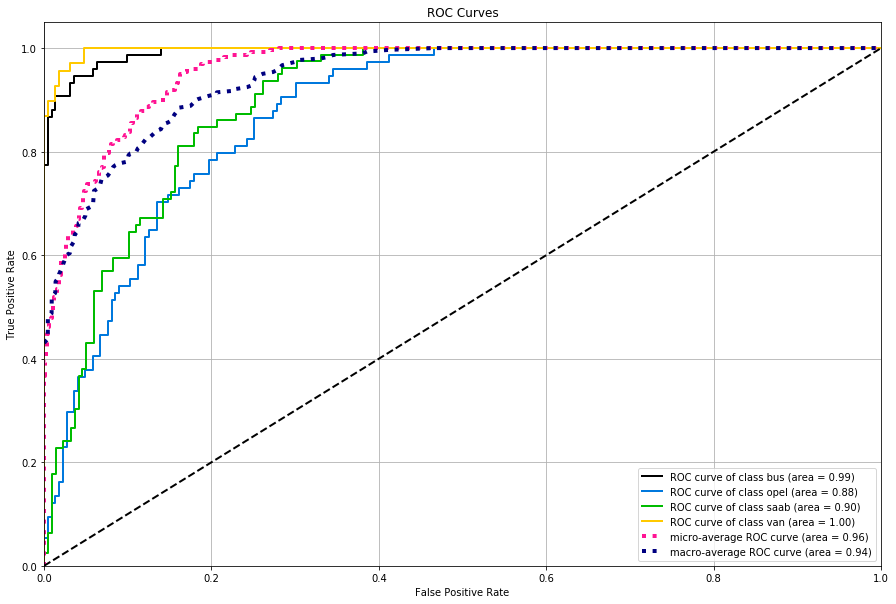

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import scikitplot

predict_proba = LogisticRegression_grid_search.predict_proba(X_test_scaled)

scikitplot.metrics.plot_roc(y_test, predict_proba, figsize = (15, 10))
plt.grid()

In [29]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

#!pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

Для использования PCA необходимы нормированные данные X_train_scaled и X_test_scaled

variance ratio =  [4.90342415e-01 1.60335150e-01 1.07791164e-01 6.26933328e-02
 5.15121114e-02 4.69993970e-02 2.83863107e-02 1.75474119e-02
 1.13366253e-02 7.80000406e-03 4.97603520e-03 3.33349907e-03
 2.13620590e-03 1.86866713e-03 1.14007163e-03 8.41455322e-04
 6.48365859e-04 2.94107433e-04 1.76708242e-05]
singular values =  [71.51756238 40.89567152 33.53162134 25.57252734 23.18022505 22.14160585
 17.20748694 13.52911873 10.87438911  9.02007995  7.20451408  5.89675578
  4.72046223  4.41498209  3.44849056  2.96263742  2.60059691  1.75152352
  0.42933014]


Text(0.5, 0, 'component number')

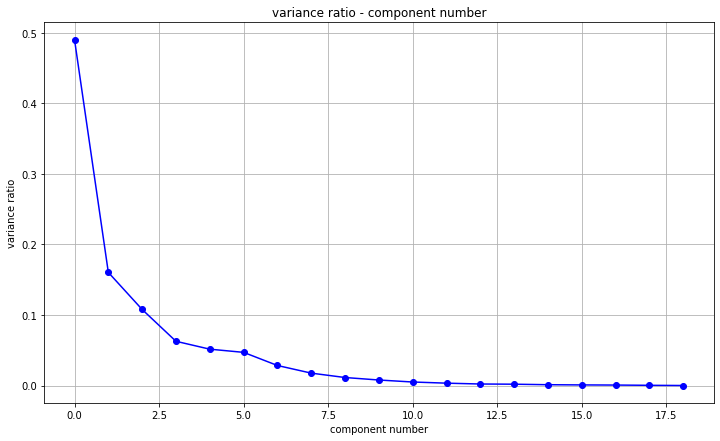

In [30]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_train_scaled) 

print("variance ratio = ", pca.explained_variance_ratio_)
print("singular values = ", pca.singular_values_)

plt.figure(figsize=(12,7))
plt.grid()
plt.title("variance ratio - component number")
plt.plot(pca.explained_variance_ratio_, 'bo-')
plt.ylabel("variance ratio")
plt.xlabel("component number")

Text(0.5, 0, 'component number')

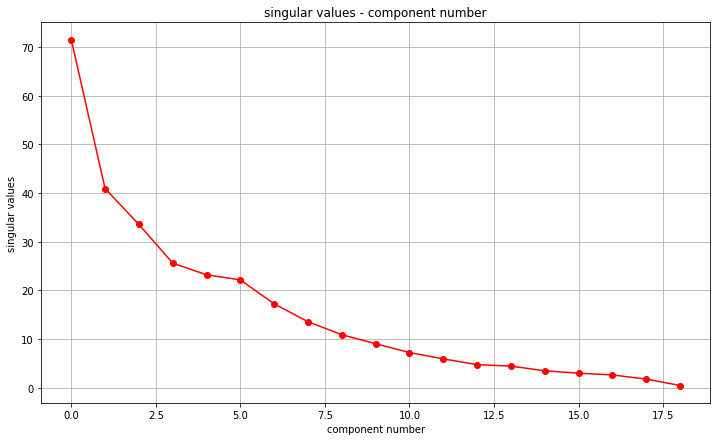

In [31]:
plt.figure(figsize=(12,7))
plt.grid()
plt.title("singular values - component number")
plt.plot(pca.singular_values_, 'ro-')
plt.ylabel("singular values")
plt.xlabel("component number")

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

1) Да, перед применением PCA данные необходимо нормировать.

2) В данном случае нет резкого разграничения по величине сингулярных чисел (нет отличия на порядок и более) и коэффициенту дисперсии (более менее значительное отличие от остальных имеют только первые 3 сингулярных числа, но их явно недостаточно - это видно при проверке), поэтому выберем компоненты с сингулярными числами больше 5 - то есть первные 12 компонент. Логика выбора следующия: при меньших значениях PCA трансформированные данные имеют явное отличие от исходных и логистическая регрессия на этих данных обеспечивает маленькую точность классификации. 

In [32]:
pca = PCA(12)
X_pca_scaled = pca.fit_transform(X_train_scaled)
X_test_pca_scaled = pca.transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [33]:
LogisticRegression_grid_search = GridSearchCV(
                            LogisticRegression(multi_class = 'multinomial',
                                               solver = 'saga',
                                               tol = 1e-3,
                                               max_iter = 500),
                            [{
                            'C': [100, 10, 1, 0.1, 0.01, 0.001], 
                            'penalty': ['l1', 'l2'],
                            }],  
                            cv=5,
                            n_jobs=-1,
                            refit=True,
                            scoring='accuracy')


y_pred = LogisticRegression_grid_search.fit(X_pca_scaled, y_train).predict(X_test_pca_scaled)

print("optimal hyperparameters for LR on PCA:", LogisticRegression_grid_search.best_params_)
print("f1 score for logistic regression on PCA: ", f1_score(y_test, y_pred, average='weighted'))
print("accuracy score for logistic regression on PCA: ", accuracy_score(y_test, y_pred))

optimal hyperparameters for LR on PCA: {'C': 100, 'penalty': 'l2'}
f1 score for logistic regression on PCA:  0.7066530789935046
accuracy score for logistic regression on PCA:  0.7104377104377104


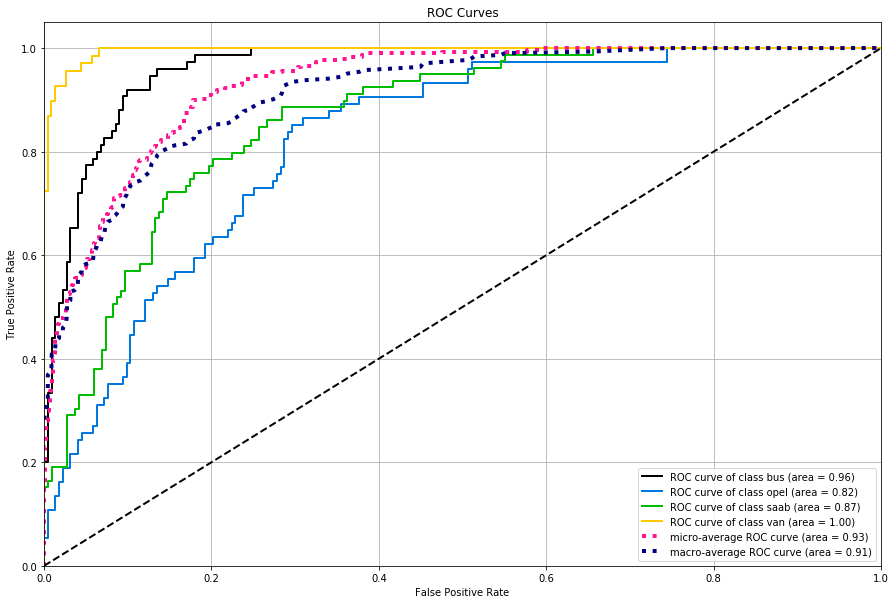

In [34]:
import scikitplot

predict_proba = LogisticRegression_grid_search.predict_proba(X_test_pca_scaled)

scikitplot.metrics.plot_roc(y_test, predict_proba, figsize = (15, 10))
plt.grid()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [202]:
from sklearn.tree import DecisionTreeClassifier

DTC_grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 3),
                            [{'max_depth': np.arange(1, 100, 1)}],   
                            cv=5,
                            n_jobs=-1,
                            refit=True,
                            scoring='accuracy')

y_pred= DTC_grid_search.fit(X_train, y_train).predict(X_test)

print("optimal depth for DTC", DTC_grid_search.best_params_)
print("f1 score for decision tree: ", f1_score(y_test, y_pred, average='weighted'))
print("accuracy score for decision tree: ", accuracy_score(y_test, y_pred))

optimal depth for DTC {'max_depth': 14}
f1 score for decision tree:  0.6771814227347825
accuracy score for decision tree:  0.6801346801346801


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

optimal number of estimators for LR = 2
optimal number of estimators for DTC = 87
best f1 score for LR = 0.7515982373382305
best f1 score for DTC = 0.7295730209132218


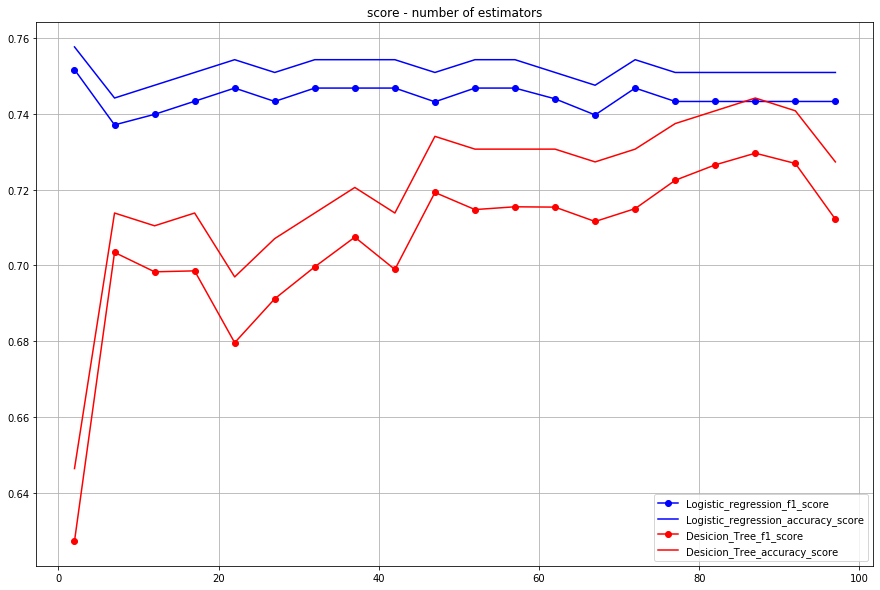

In [193]:
from sklearn.ensemble import BaggingClassifier


n_estimator = np.arange(2, 100, 5)
k = 0
f1_score_LR = np.zeros(len(n_estimator))
accuracy_score_LR = np.zeros(len(n_estimator))
f1_score_DTC = np.zeros(len(n_estimator))
accuracy_score_DTC = np.zeros(len(n_estimator))

for i in n_estimator:
    BC_LR = BaggingClassifier(
                              base_estimator = LogisticRegression(
                                          multi_class = 'multinomial',
                                          solver = 'saga',
                                          tol = 1e-3,
                                          max_iter = 500
                                          ),
                              n_estimators = i,
                              max_samples = 1.,
                              random_state = 3
                              )
    
    BC_DTC = BaggingClassifier(
        base_estimator = DecisionTreeClassifier(random_state = 3),
        n_estimators = i,
        max_samples = 1.,
        random_state = 3
                               )
    
    y_pred_LR = BC_LR.fit(X_train_scaled, y_train).predict(X_test_scaled)
    y_pred_DTC = BC_DTC.fit(X_train, y_train).predict(X_test)

    f1_score_LR[k] = f1_score(y_test, y_pred_LR, average='weighted')
    accuracy_score_LR[k] = accuracy_score(y_test, y_pred_LR)
    
    f1_score_DTC[k] = f1_score(y_test, y_pred_DTC, average='weighted')
    accuracy_score_DTC[k] = accuracy_score(y_test, y_pred_DTC)
    
    k += 1
    
list(f1_score_LR).index(max(f1_score_LR))    
list(f1_score_DTC).index(max(f1_score_DTC))  
    
plt.figure(figsize=(15, 10))    
plt.grid()
plt.title("score - number of estimators")
plt.plot(n_estimator, f1_score_LR, 'bo-', label = 'Logistic_regression_f1_score')
plt.plot(n_estimator, accuracy_score_LR, c = 'b', label = 'Logistic_regression_accuracy_score')
plt.plot(n_estimator, f1_score_DTC, 'ro-', label = 'Desicion_Tree_f1_score')
plt.plot(n_estimator, accuracy_score_DTC, c = 'r', label = 'Desicion_Tree_accuracy_score')
plt.legend()   


print("optimal number of estimators for LR =", list(f1_score_LR).index(max(f1_score_LR)) * 5 + 2) 
print("optimal number of estimators for DTC =", list(f1_score_DTC).index(max(f1_score_DTC)) * 5 + 2) 
print("best f1 score for LR =", f1_score_LR[list(f1_score_LR).index(max(f1_score_LR))]) 
print("best f1 score for DTC =", f1_score_DTC[list(f1_score_DTC).index(max(f1_score_DTC))]) 

1) В случае с логистической регрессией score возрастает при увеличении числа классификаторов до 20-40 (зависит от разбиения данных на train и test), а затем остаётся на одном уровне. В случае с решающими деревьями score возрастает при увеличении числа классификаторов до 80 (иногда вплоть до 100) . Также наблюдается значительное улучшение качества при увеличении числа классификаторов до 20 на решающих деревьях. Это связано с более простым алгоритмом работы desicion tree classifier. (Логистическая регрессия в данном случае является более стабильной и точной, поэтому не требуется усреднять много алгоритмов для достижения оптимальной точности в отличие от решающих деревьев) 

2) Оптимальное число классификаторов выведено над графиком. 

3) Оптимальные гиперпараметры для desicion tree classifier не будут оптимальными для bagging classifier с desicion tree. Desicion tree classifier работает единоразово со всеми данными train. Bagging classifier с desicion tree делает выборки из этих данных и усредняет (данная процедура повторяется несколько раз). 

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [13]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest_grid_search = GridSearchCV(RandomForestClassifier(random_state = 3),
                            [{'n_estimators': np.arange(2, 100, 2)}],              
                            cv=5,
                            n_jobs=-1,
                            refit=True,
                            scoring='accuracy')    
    
y_pred = Random_Forest_grid_search.fit(X_train, y_train).predict(X_test)

print("optimal number of trees for random forest: ",Random_Forest_grid_search.best_params_) 
print("f1 score for random forest: ", f1_score(y_test, y_pred, average='weighted'))
print("accuracy score for random forest: ", accuracy_score(y_test, y_pred))

optimal number of trees for random forest:  {'n_estimators': 40}
f1 score for random forest:  0.6823416305078609
accuracy score for random forest:  0.6936026936026936


optimal number of trees for RFC = 86
best f1 score for RFC = 0.6927183230729195
best accuracy score for RFC = 0.7070707070707071


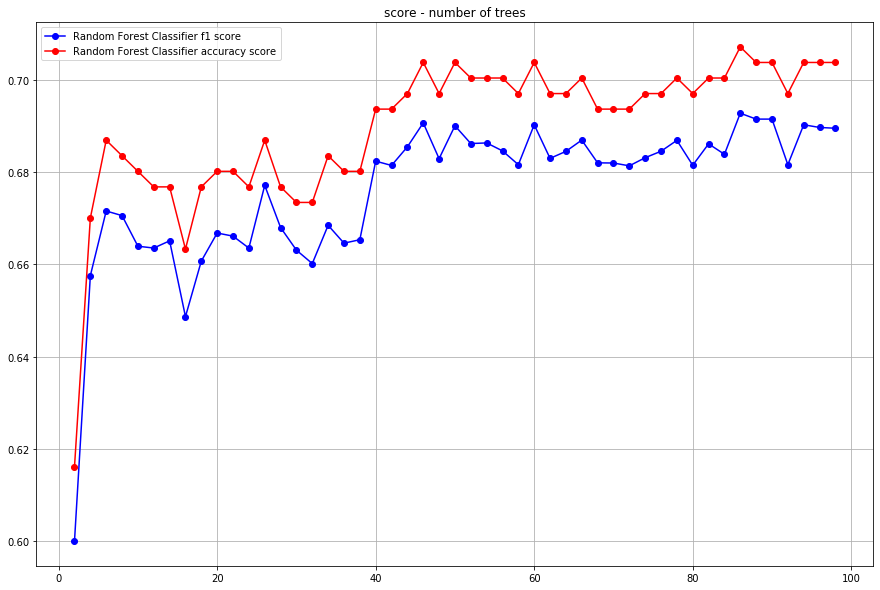

In [12]:
n_trees = np.arange(2, 100, 2)
f1_score_RFC = np.zeros(len(n_trees))
accuracy_score_RFC = np.zeros(len(n_trees))
k = 0

for i in n_trees:

    RFC = RandomForestClassifier(n_estimators = i, random_state = 3)
    y_pred = RFC.fit(X_train, y_train).predict(X_test)

    f1_score_RFC[k] = f1_score(y_test, y_pred, average='weighted')
    accuracy_score_RFC[k] = accuracy_score(y_test, y_pred)

    k += 1

plt.figure(figsize=(15, 10)) 
plt.grid()
plt.title("score - number of trees")
plt.plot(n_trees, f1_score_RFC, 'bo-', label = 'Random Forest Classifier f1 score')
plt.plot(n_trees, accuracy_score_RFC, 'ro-', label = 'Random Forest Classifier accuracy score')
plt.legend()   

print("optimal number of trees for RFC =", list(f1_score_RFC).index(max(f1_score_RFC)) * 2 + 2) 
print("best f1 score for RFC =", f1_score_RFC[list(f1_score_RFC).index(max(f1_score_RFC))]) 
print("best accuracy score for RFC =", accuracy_score_RFC[list(accuracy_score_RFC).index(max(accuracy_score_RFC))]) 

Значения оптимального числа деревьев в Random Forest отличается от величины, полученной в пункте 2.6. 

Далее построим графики усреднённых значений f1 score и accuracy score для получения более стабильного результата. То есть запускаем алгоритм n_tr раз, разделяя датасет на train и test заново, и усредняем полученные значения. 

optimal number of trees for RFC = 56
best f1 score for RFC = 0.7362724240030337
best accuracy score for RFC = 0.7447811447811448


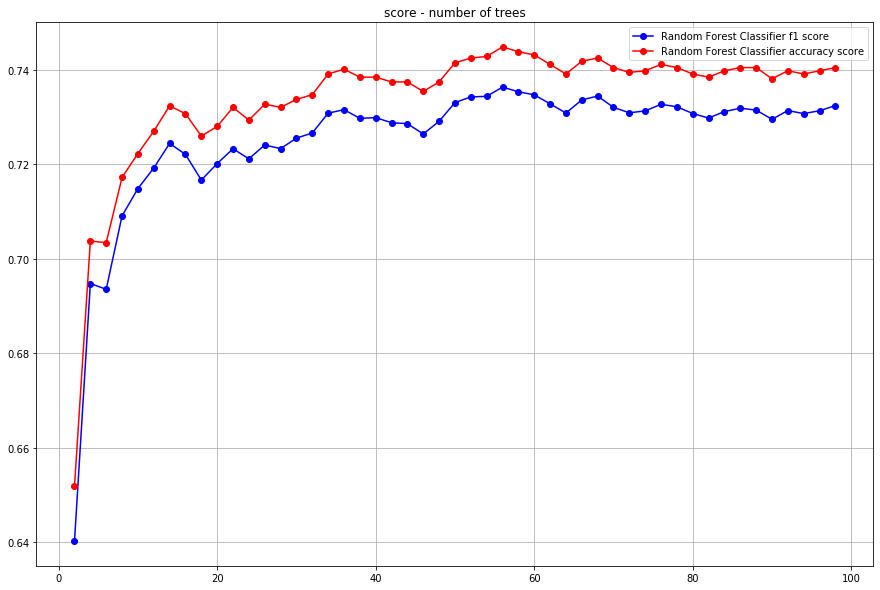

In [14]:
n_trees = np.arange(2, 100, 2)
f1_score_RFC = np.zeros(len(n_trees))
accuracy_score_RFC = np.zeros(len(n_trees))


n_tr = 10 

for l in range(0, n_tr):
    
    k = 0
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
        
    for i in n_trees:

        RFC = RandomForestClassifier(n_estimators = i, random_state = 3)
        y_pred = RFC.fit(X_train, y_train).predict(X_test)

        f1_score_RFC[k] += f1_score(y_test, y_pred, average='weighted')
        accuracy_score_RFC[k] += accuracy_score(y_test, y_pred)

        k += 1

plt.figure(figsize=(15, 10))    
plt.grid()
plt.title("score - number of trees")
plt.plot(n_trees, f1_score_RFC / n_tr, 'bo-', label = 'Random Forest Classifier f1 score')
plt.plot(n_trees, accuracy_score_RFC / n_tr, 'ro-', label = 'Random Forest Classifier accuracy score')
plt.legend()   

print("optimal number of trees for RFC =", list(f1_score_RFC).index(max(f1_score_RFC)) * 2 + 2) 
print("best f1 score for RFC =", f1_score_RFC[list(f1_score_RFC).index(max(f1_score_RFC))] / n_tr) 
print("best accuracy score for RFC =", accuracy_score_RFC[list(accuracy_score_RFC).index(max(accuracy_score_RFC))] / n_tr) 

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

Сначала проделаем необходимые действия, подбирая оптимальные гиперпараметры на каждом шаге. То есть для 1/10 части данных, для 2/10 и т.д. параметры подбираются индивидуально. 

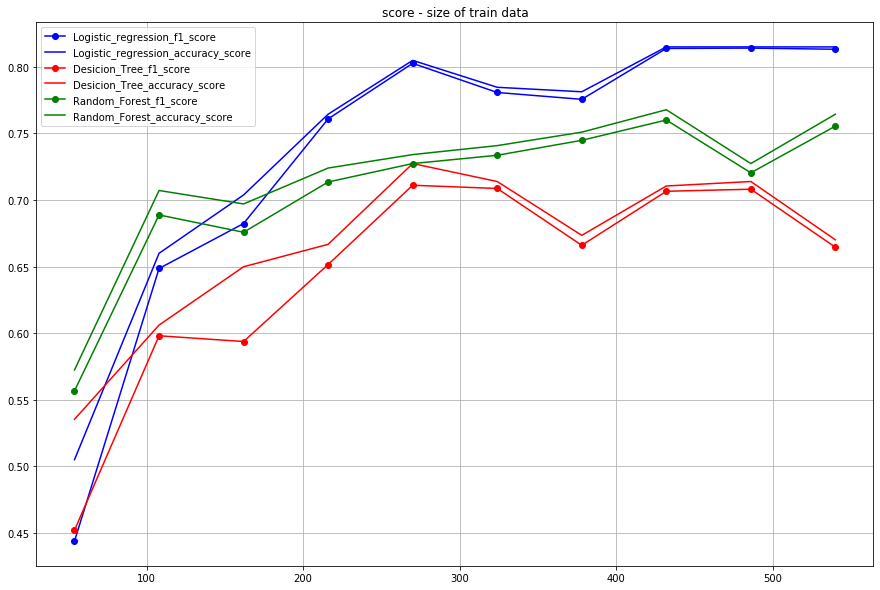

In [208]:
import matplotlib.pyplot as plt
from warnings import simplefilter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
simplefilter(action='ignore')

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

num_batches = 10
batch_size = len(X_train) // num_batches

Logistic_regression_f1_score = np.zeros(num_batches)
Logistic_regression_accuracy_score = np.zeros(num_batches)

Desicion_Tree_f1_score = np.zeros(num_batches)
Desicion_Tree_accuracy_score = np.zeros(num_batches)

Random_Forest_f1_score = np.zeros(num_batches)
Random_Forest_accuracy_score = np.zeros(num_batches)

axis = np.arange(batch_size, batch_size * (num_batches + 1), batch_size)

X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)


for i in range(0, num_batches):
    
    X_train_batch = X_train[0: (i + 1) * batch_size, :]
    y_train_batch = y_train[0: (i + 1) * batch_size]
    
    X_train_batch_scaled = std.fit_transform(X_train_batch)

    LogisticRegression_grid_search = GridSearchCV(
                            LogisticRegression(
                                    multi_class = 'multinomial',
                                    solver = 'saga',
                                    tol = 1e-3,
                                    max_iter = 1000),
                            [{
                            'C': np.arange(0.2, 3.0, 0.2), 
                            'penalty': ['l1', 'l2'],
                            }],  
                            cv=5,
                            n_jobs=-1,
                            refit=True,
                            scoring='accuracy')
    
    Desicion_Tree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 3),
                            [{'max_depth': np.arange(2, 100, 2)}],   
                            cv=5,
                            n_jobs=-1,
                            refit=True,
                            scoring='accuracy')

    Random_Forest_grid_search = GridSearchCV(RandomForestClassifier(random_state = 3),
                            [{'n_estimators': np.arange(5, 100, 5)}],   
                            cv=5,
                            n_jobs=-1,
                            refit=True,
                            scoring='accuracy')    
    
    LRL_y_pred = LogisticRegression_grid_search.fit(X_train_batch_scaled, y_train_batch).predict(X_test_scaled)
    DTC_y_pred = Desicion_Tree_grid_search.fit(X_train_batch, y_train_batch).predict(X_test)
    RFC_y_pred = Random_Forest_grid_search.fit(X_train_batch, y_train_batch).predict(X_test)
    
    
    
    Logistic_regression_f1_score[i] = f1_score(y_test, LRL_y_pred, average='weighted')
    Logistic_regression_accuracy_score[i] = accuracy_score(y_test, LRL_y_pred)
    
    Desicion_Tree_f1_score[i] = f1_score(y_test, DTC_y_pred, average='weighted')
    Desicion_Tree_accuracy_score[i] = accuracy_score(y_test, DTC_y_pred)

    Random_Forest_f1_score[i] = f1_score(y_test, RFC_y_pred, average='weighted')
    Random_Forest_accuracy_score[i] = accuracy_score(y_test, RFC_y_pred)
    
    
    
    
plt.figure(figsize=(15, 10))   
plt.grid()
plt.title("score - size of train data")
plt.plot(axis, Logistic_regression_f1_score, 'bo-', label = 'Logistic_regression_f1_score')
plt.plot(axis, Logistic_regression_accuracy_score, c = 'b', label = 'Logistic_regression_accuracy_score')
plt.plot(axis, Desicion_Tree_f1_score, 'ro-', label = 'Desicion_Tree_f1_score')
plt.plot(axis, Desicion_Tree_accuracy_score, c = 'r', label = 'Desicion_Tree_accuracy_score')
plt.plot(axis, Random_Forest_f1_score, 'go-', label = 'Random_Forest_f1_score')
plt.plot(axis, Random_Forest_accuracy_score, c = 'g', label = 'Random_Forest_accuracy_score')
plt.legend()

Наблюдается явный рост качества классификации при увеличении размера train выборки. Более наглядный результат можно получить, если запустить алгоритм несколько раз для различных разбиений данных на train и test (но уже без подбора оптимальных параметров на каждом шаге)

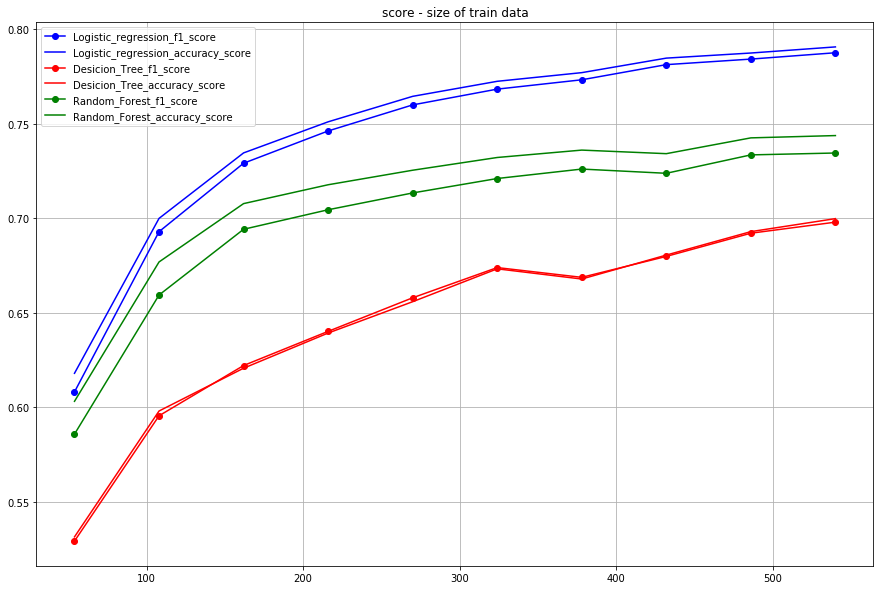

In [206]:
import matplotlib.pyplot as plt
from warnings import simplefilter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


simplefilter(action='ignore')

num_batches = 10
batch_size = len(X_train) // num_batches

Logistic_regression_f1_score = np.zeros(num_batches)
Logistic_regression_accuracy_score = np.zeros(num_batches)

Desicion_Tree_f1_score = np.zeros(num_batches)
Desicion_Tree_accuracy_score = np.zeros(num_batches)

Random_Forest_f1_score = np.zeros(num_batches)
Random_Forest_accuracy_score = np.zeros(num_batches)

axis = np.arange(batch_size, batch_size * (num_batches + 1), batch_size)

n_tr = 25 

for k in range(0, n_tr):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
    
    std.fit(X_train)
    X_train_scaled = std.transform(X_train)

    X_test_scaled = std.transform(X_test)
    
    for i in range(0, num_batches):

        X_train_batch = X_train[0: (i + 1) * batch_size, :]
        y_train_batch = y_train[0: (i + 1) * batch_size]

        X_train_batch_scaled = std.fit_transform(X_train_batch)

        LRL = LogisticRegression(C = 1.6,
                                 penalty = 'l1',
                                 multi_class = 'multinomial', solver = 'saga',
                                 tol = 1e-3, max_iter = 1000)

        DTC = DecisionTreeClassifier(max_depth = 14, random_state = 3)

        RFC = RandomForestClassifier(n_estimators = 54, random_state = 3)

        LRL_y_pred = LRL.fit(X_train_batch_scaled, y_train_batch).predict(X_test_scaled)
        DTC_y_pred = DTC.fit(X_train_batch, y_train_batch).predict(X_test)
        RFC_y_pred = RFC.fit(X_train_batch, y_train_batch).predict(X_test)



        Logistic_regression_f1_score[i] += f1_score(y_test, LRL_y_pred, average='weighted')
        Logistic_regression_accuracy_score[i] += accuracy_score(y_test, LRL_y_pred)

        Desicion_Tree_f1_score[i] += f1_score(y_test, DTC_y_pred, average='weighted')
        Desicion_Tree_accuracy_score[i] += accuracy_score(y_test, DTC_y_pred)

        Random_Forest_f1_score[i] += f1_score(y_test, RFC_y_pred, average='weighted')
        Random_Forest_accuracy_score[i] += accuracy_score(y_test, RFC_y_pred)

    
    
    
plt.figure(figsize=(15, 10))    
plt.grid()
plt.title("score - size of train data")
plt.plot(axis, Logistic_regression_f1_score/n_tr, 'bo-', label = 'Logistic_regression_f1_score')
plt.plot(axis, Logistic_regression_accuracy_score/n_tr, c = 'b', label = 'Logistic_regression_accuracy_score')
plt.plot(axis, Desicion_Tree_f1_score/n_tr, 'ro-', label = 'Desicion_Tree_f1_score')
plt.plot(axis, Desicion_Tree_accuracy_score/n_tr, c = 'r', label = 'Desicion_Tree_accuracy_score')
plt.plot(axis, Random_Forest_f1_score/n_tr, 'go-', label = 'Random_Forest_f1_score')
plt.plot(axis, Random_Forest_accuracy_score/n_tr, c = 'g', label = 'Random_Forest_accuracy_score')
plt.legend()

Таким образом, размер обучающей выборки напрямую влияет на качество работы алгоритма - с ростом размеры обучающей выборки растёт качество модели.